## How does the derived mass depend on assumed excitation temperature?
I wish to emulate Figure 7 from Dunham et al. (2014), which shows the correction factor for outflow mass for different assumed Tex compared to their assumed value of 50 K from both 12CO (2-1) and (3-2). 

My strategy will be to use the column_density_H2 function in my physics.py module on an example subcube with a series of different Tex values input. Then, I will simply sum the resulting column density maps to get something proportional to the total mass and normalize by the mass at some suitable example Tex (such as 50 K like Dunham et al. (2014)). 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, "..")
from stamp import *
from physics import *
import re
import os
from scipy.optimize import curve_fit
%load_ext autoreload
%autoreload 2

In [3]:
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")
c12

SpectralCube with shape=(86, 4273, 2557) and unit=K:
 n_x:   2557  type_x: RA---SIN  unit_x: deg    range:    83.282963 deg:   84.714228 deg
 n_y:   4273  type_y: DEC--SIN  unit_y: deg    range:    -7.181143 deg:   -4.807387 deg
 n_s:     86  type_s: VOPT      unit_s: m / s  range:    -1939.033 m / s:   19316.951 m / s

In [4]:
sub = c12.subcube(1000,1100,1000,1100,50,55)
Tex_arr = np.linspace(2,100,200)*u.K
nH2_list = [column_density_H2(sub, Tex).sum().value for Tex in Tex_arr]
nH2_norm = column_density_H2(sub, 50.*u.K).sum().value
nH2_64p45 = column_density_H2(sub, 64.45*u.K).sum().value
nH2_100 = column_density_H2(sub, 100*u.K).sum().value
nH2_300 = column_density_H2(sub, 300*u.K).sum().value



correction_factor = [nH2 / nH2_norm for nH2 in nH2_list]

Text(0, 0.5, 'M (T$_{\\rm ex}$) / M (50 K)')

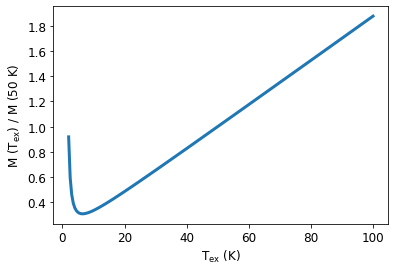

In [5]:
plt.plot(Tex_arr, correction_factor)
plt.xlabel(r"T$_{\rm ex}$ (K)")
plt.ylabel(r"M (T$_{\rm ex}$) / M (50 K)")

In [6]:
nH2_300 = column_density_H2(sub, 300*u.K).sum().value
print(nH2_100/nH2_64p45)
print(nH2_300/nH2_64p45)
Tex_arr

1.4973271323356947
4.30283960922559


<Quantity [  2.        ,   2.49246231,   2.98492462,   3.47738693,
             3.96984925,   4.46231156,   4.95477387,   5.44723618,
             5.93969849,   6.4321608 ,   6.92462312,   7.41708543,
             7.90954774,   8.40201005,   8.89447236,   9.38693467,
             9.87939698,  10.3718593 ,  10.86432161,  11.35678392,
            11.84924623,  12.34170854,  12.83417085,  13.32663317,
            13.81909548,  14.31155779,  14.8040201 ,  15.29648241,
            15.78894472,  16.28140704,  16.77386935,  17.26633166,
            17.75879397,  18.25125628,  18.74371859,  19.2361809 ,
            19.72864322,  20.22110553,  20.71356784,  21.20603015,
            21.69849246,  22.19095477,  22.68341709,  23.1758794 ,
            23.66834171,  24.16080402,  24.65326633,  25.14572864,
            25.63819095,  26.13065327,  26.62311558,  27.11557789,
            27.6080402 ,  28.10050251,  28.59296482,  29.08542714,
            29.57788945,  30.07035176,  30.56281407,  31.05527

[0.01745083 0.12843166]
Mass ratio = 0.01745083431051251 x Tex + 0.12843165614137156


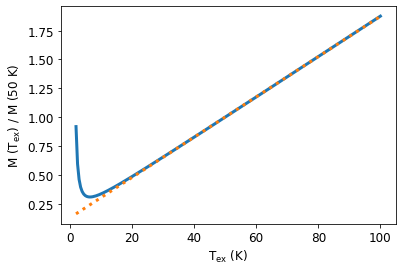

In [7]:
def lin_func(x, m, b):
    return m*x + b
params, param_cov = curve_fit(lin_func, Tex_arr[50:].value, correction_factor[50:])
print(params)
plt.plot(Tex_arr, correction_factor)
plt.xlabel(r"T$_{\rm ex}$ (K)")
plt.ylabel(r"M (T$_{\rm ex}$) / M (50 K)")
plt.plot(Tex_arr.value, lin_func(Tex_arr.value, params[0], params[1]), ':')
print("Mass ratio = {} x Tex + {}".format(params[0], params[1]))

In [8]:
fac = 0.937
print(0.94*2)
print(nH2_100 / nH2_norm)
print(0.94*3)
print(nH2_300 / nH2_100)
#(nH2_300 / nH2_100)/3

1.88
1.8749924657397468
2.82
2.873680384401737


In [14]:
print(nH2_300 / nH2_norm)
print(nH2_100 / nH2_norm)


5.388129069697356
1.8749924657397468


In [20]:
def y(x):
    return 10*x
print(y(1), y(3), y(10))
print(1, 3, 10)

10 30 100
1 3 10


In [27]:
print(nH2_norm/nH2_norm, nH2_100/nH2_norm, nH2_300/nH2_norm)
print(50, 100, 300)
print(lin_func(50, params[0], params[1])/lin_func(50,params[0], params[1]), lin_func(100, params[0], params[1])/lin_func(50,params[0], params[1]), lin_func(300, params[0], params[1])/lin_func(50,params[0], params[1]))

1.0 1.8749924657397468 5.388129069697356
50 100 300
1.0 1.8716932340293084 5.358466170146541


In [30]:
5.358466170146541 / 6

0.8930776950244236